## HW04_YUANJUN GE

In [1]:
import numpy as np
import random
import glob
import os


def read_file(file_path):
    with open(file_path,'r') as f:
        text = f.read()
    return text

# load trainning data
languages = ['e', 'j', 's']
trainSet = {'e':{}, 'j':{}, 's':{}}
trianSet_count = {'e':{}, 'j':{}, 's':{}}
for language in languages:
    record_27 = {chr(97 + i): 0 for i in range(26)}
    record_27[' '] =0
    count = 0
    for file in glob.glob(f"./languageID/{language}[0-9].txt"):
        count +=1
        #print(file)
        text = read_file(file)
        for char in text:
            if char == '\n':
                continue
            else:
                    record_27[char] += 1
    trainSet[language] = dict(sorted(record_27.items(), key=lambda item: (item[0] == ' ', item[0])))
    trianSet_count[language] = count


Q3.1

In [2]:
def prior_fuc(x,N, alpha, KL):
    return (x+alpha) / (N + alpha*KL)

N = trianSet_count['e'] + trianSet_count['s'] + trianSet_count['j']
print("Prior probability of p(y=e): ", prior_fuc(trianSet_count['e'],N, 0.5,3))
print("Prior probability of p(y=s): ", prior_fuc(trianSet_count['s'],N, 0.5,3))
print("Prior probability of p(y=j): ", prior_fuc(trianSet_count['j'],N, 0.5,3))

Prior probability of p(y=e):  0.3333333333333333
Prior probability of p(y=s):  0.3333333333333333
Prior probability of p(y=j):  0.3333333333333333


Q3.2

In [3]:

def conditionalprobability(data, KL,alpha):
    l = []
    N = 0
    for count in data.values():
        N +=count
    for count in data.values():
        l.append((count+alpha)/(N + KL*alpha))
    return l

e_conProb = conditionalprobability(trainSet['e'],27,0.5)
e_conProb

[0.0601685114819098,
 0.011134974392863043,
 0.021509995043779945,
 0.021972575582355856,
 0.1053692383941847,
 0.018932760614571286,
 0.017478936064761277,
 0.047216256401784236,
 0.055410540227986124,
 0.001420783082768875,
 0.0037336857756484387,
 0.028977366595076822,
 0.020518751032545846,
 0.057921691723112505,
 0.06446390219725756,
 0.01675202378985627,
 0.0005617049396993227,
 0.053824549810011564,
 0.06618205848339666,
 0.08012555757475633,
 0.026664463902197257,
 0.009284652238559392,
 0.015496448042293078,
 0.001156451346439782,
 0.013844374690236246,
 0.0006277878737815959,
 0.1792499586981662]

Q3.3

In [4]:
trainSet['j']

{'a': 1885,
 'b': 155,
 'c': 78,
 'd': 246,
 'e': 861,
 'f': 55,
 'g': 200,
 'h': 454,
 'i': 1388,
 'j': 33,
 'k': 821,
 'l': 20,
 'm': 569,
 'n': 811,
 'o': 1304,
 'p': 12,
 'q': 1,
 'r': 612,
 's': 603,
 't': 815,
 'u': 1010,
 'v': 3,
 'w': 282,
 'x': 0,
 'y': 202,
 'z': 110,
 ' ': 1766}

In [5]:
j_conProb = conditionalprobability(trainSet['j'],27,0.5)
j_conProb

[0.1317656102589189,
 0.010866906600510151,
 0.005485866033054963,
 0.01722631818022992,
 0.06020475907613823,
 0.003878542227191726,
 0.014011670568503443,
 0.03176211607673224,
 0.09703343932352633,
 0.0023411020650616725,
 0.05740941332681086,
 0.001432614696530277,
 0.03979873510604843,
 0.05671057688947902,
 0.09116321324993885,
 0.0008735455466648031,
 0.00010482546559977637,
 0.04280373178657535,
 0.0421747789929767,
 0.056990111464411755,
 0.07061742199238269,
 0.0002445927530661449,
 0.01974212935462455,
 3.4941821866592126e-05,
 0.01415143785596981,
 0.00772214263251686,
 0.12344945665466997]

In [6]:
s_conProb = conditionalprobability(trainSet['s'],27,0.5)
s_conProb

[0.10456045141993771,
 0.008232863618143134,
 0.03752582405722919,
 0.039745922111559924,
 0.1138108599796491,
 0.00860287996053159,
 0.0071844839813758445,
 0.0045327001942585795,
 0.049859702136844375,
 0.006629459467793161,
 0.0002775122567913416,
 0.052943171656748174,
 0.02580863988159477,
 0.054176559464709693,
 0.07249236841293824,
 0.02426690512164287,
 0.007677839104560451,
 0.05929511886774999,
 0.06577040485954797,
 0.03561407295488884,
 0.03370232185254849,
 0.00588942678301625,
 9.250408559711388e-05,
 0.0024976103111220747,
 0.007862847275754679,
 0.0026826184823163022,
 0.16826493170115014]

Q3.4

In [7]:
e_10 = {chr(97 + i): 0 for i in range(26)}
e_10[' '] =0
for file in glob.glob(f"./languageID/e10.txt"):
    text = read_file(file)
    for char in text:
        if char == '\n':
            continue
        else:
            e_10[char] += 1
    e_10 = dict(sorted(e_10.items(), key=lambda item: (item[0] == ' ', item[0])))
e_10_vector = []
for value in e_10.values():
    e_10_vector.append(value)
e_10_vector

[164,
 32,
 53,
 57,
 311,
 55,
 51,
 140,
 140,
 3,
 6,
 85,
 64,
 139,
 182,
 53,
 3,
 141,
 186,
 225,
 65,
 31,
 47,
 4,
 38,
 2,
 498]

Q3.5

In [8]:
Prxe_log_prob = 0
for i, prob in enumerate(e_conProb):
    Prxe_log_prob += e_10_vector[i]*np.log(prob)
print('log probability given y=e: ' + str(Prxe_log_prob))
Prxj_log_prob = 0
for i, prob in enumerate(j_conProb):
    Prxj_log_prob += e_10_vector[i]*np.log(prob)
print('log probability given y=j: ' + str(Prxj_log_prob))
Prxs_log_prob = 0
for i, prob in enumerate(s_conProb):
    Prxs_log_prob += e_10_vector[i]*np.log(prob)
print('log probability given y=s: ' + str(Prxs_log_prob))

log probability given y=e: -7841.865447060635
log probability given y=j: -8771.433079075032
log probability given y=s: -8467.282044010557


Q3.6 See the pdf

Q3.7

In [9]:
def predict(language,number):
    dict27 = {chr(97 + i): 0 for i in range(26)}
    dict27[' '] =0
    for file in glob.glob(f"./languageID/{language}{number}.txt"):
        text = read_file(file)
        for char in text:
            if char == '\n':
                continue
            else:
                dict27[char] += 1
        dict27 = dict(sorted(dict27.items(), key=lambda item: (item[0] == ' ', item[0])))
    vector = []
    for value in dict27.values():
        vector.append(value)

    log_probs = []    
    Prxe_log_prob = 0
    for i, prob in enumerate(e_conProb):
        Prxe_log_prob += vector[i]*np.log(prob)
    log_probs.append(Prxe_log_prob)
    Prxj_log_prob = 0
    for i, prob in enumerate(j_conProb):
        Prxj_log_prob += vector[i]*np.log(prob)
    log_probs.append(Prxj_log_prob)
    Prxs_log_prob = 0
    for i, prob in enumerate(s_conProb):
        Prxs_log_prob += vector[i]*np.log(prob)
    log_probs.append(Prxs_log_prob)

    predict = np.argmax(log_probs)
    return predict

In [10]:
matrix = np.zeros((3, 3))
for index,language in enumerate(languages):
    for i in range(10,20):
        yhat = predict(language,i)
        matrix[yhat][index] +=1
matrix

array([[10.,  0.,  0.],
       [ 0., 10.,  0.],
       [ 0.,  0., 10.]])

Q3.8

In [11]:
#shuffle, take e14 as an example
with open('./languageID/e14.txt', 'r') as file:
    text = file.read()
char_list = list(text)
random.shuffle(char_list)
shuffled_text = ''.join(char_list)
with open('./languageID/eShuffle14.txt', 'w') as file:
    file.write(shuffled_text)

# compare if the prediction for e14 same as the prediction for e14_shuffle
print(predict("e",14) == predict("eShuffle",14))

#delete the shuffled file to make the dataset clean
os.remove('./languageID/eShuffle14.txt')

True


Q4.2

In [12]:
import torch
from torchvision import datasets, transforms

# define the hyperparameters
batch_size = 32
input_size = 784 # 28*28 pixels
hidden_layer_size = 300
output_size = 10 
lr = 0.01
epochs = 30

# load data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])
trainSet = datasets.MNIST('./', download=True, train=True, transform=transform)
testSet = datasets.MNIST('./', download=True, train=False, transform=transform)
trainLoader = torch.utils.data.DataLoader(trainSet, batch_size=batch_size, shuffle=True)
testLoader = torch.utils.data.DataLoader(testSet, batch_size=batch_size, shuffle=True)

# def functions
def sigmoid(x):
    return 1/(1 + np.exp(-x))

def softmax(x):
    exps = np.exp(x)
    denom = np.sum(exps, axis=1)
    denom.resize(exps.shape[0], 1)
    return exps / denom

# def cross_entropy_loss(y, y_hat):
#     return -np.sum(y * np.log(y_hat))



def forward(inputs,w1,w2):
    inputs = inputs.numpy()
    linear_1 = inputs.dot(w1)
    out1 = sigmoid(linear_1)
    linear2 = out1.dot(w2)
    out2 = softmax(linear2)
    return out1, out2, linear_1

def backProp(x_train, y_train, out2, out1,linear_1, w2):
        x_train = x_train.numpy()
        y_train = y_train.numpy()
        batch_size = y_train.shape[0]

        d_loss = out2 - y_train

        # Calculating delta for W2
        change_w2 = (1./batch_size) * np.matmul(out1.T, d_loss)

        d_out_1 = np.matmul(d_loss, w2.T)
        d_linear_1 = d_out_1 * sigmoid(linear_1) * (1 - sigmoid(linear_1))

        # Calculating delta for W1
        change_w1 = (1. / batch_size) * np.matmul(x_train.T, d_linear_1)
        return change_w1, change_w2

def update(w1,w2, change_w1, change_w2):
    w1 -= lr * change_w1
    w2 -= lr * change_w2

def accuracy(testLoader,w1,w2):
    correct =0
    total = 0
    for i, data in enumerate(testLoader):
        x, y = data
        y_onehot = torch.zeros(y.shape[0], 10)
        y_onehot[range(y_onehot.shape[0]), y] = 1
        
        flattened_input = x.view(-1, 28*28)
        out1, out2, linear_1 = forward(flattened_input,w1,w2)
        predicted = np.argmax(out2, axis=1)
        # Calculating correctly predicted labels
        correct += np.sum((predicted==y.numpy()))
        total += y.shape[0]
    return correct/total

#train the model
w1 = np.random.uniform(low=-1, high=1, size=(input_size, hidden_layer_size))
w2 = np.random.uniform(low=-1, high=1, size=(hidden_layer_size, output_size))

test_accuracy = []
for iteration in range(epochs):
    for i, data in enumerate(trainLoader):
        x, y = data
        y_onehot = torch.zeros(y.shape[0], 10)
        y_onehot[range(y_onehot.shape[0]), y]=1
        flattened_input = x.view(-1, 28*28)
        out1, out2, linear_1 = forward(flattened_input,w1,w2)
        w1_update, w2_update = backProp(flattened_input, y_onehot, out2, out1,linear_1,w2)
        update(w1,w2,w1_update,w2_update)
    test_accuracy.append(accuracy(testLoader,w1,w2))

[0.7516, 0.8111, 0.8371, 0.8547, 0.8665, 0.8716, 0.8791, 0.8839, 0.8869, 0.889, 0.8938, 0.8974, 0.899, 0.902, 0.9025, 0.906, 0.9073, 0.9092, 0.9105, 0.9119, 0.9141, 0.9144, 0.9173, 0.9174, 0.9171, 0.9186, 0.919, 0.9212, 0.9202, 0.9214]


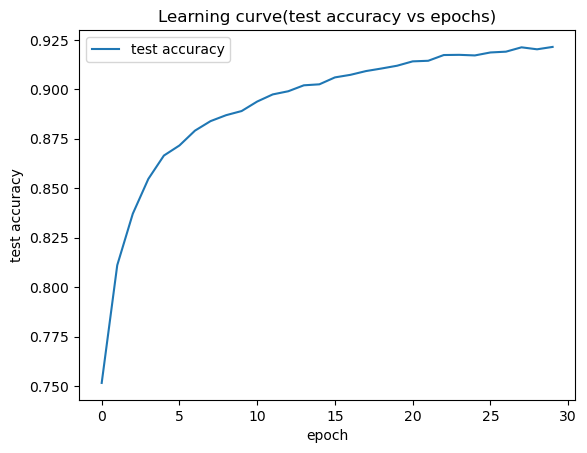

In [13]:
import matplotlib.pyplot as plt
print(test_accuracy)
plt.plot(range(epochs), test_accuracy,label='test accuracy' )
plt.legend()
plt.title('Learning curve(test accuracy vs epochs)')
plt.xlabel('epoch')
plt.ylabel('test accuracy')
plt.show()

Q4.3

In [14]:
from torch import nn
model = nn.Sequential(nn.Linear(input_size, hidden_layer_size, bias=False),
                      nn.Sigmoid(),
                      nn.Linear(hidden_layer_size, output_size, bias=False),
                      nn.LogSoftmax(dim=1))
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.0)
criterion = nn.NLLLoss() # to the LogSoftmax layer, if use cross entropy then no need logsoftmax

accuracy_nn = []
# train 
for i in range(epochs):
    for images, labels in trainLoader:
        images = images.view(images.shape[0], -1)
        # clear the last step gradient
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()

    # test
    correct, total = 0, 0
    for images,labels in testLoader:
        for i in range(len(labels)):
            img = images[i].view(1, 28*28)
            # Turn off gradients for forward pass
            with torch.no_grad():
                logps = model(img)
            ps = torch.exp(logps)
            probab = list(ps.numpy()[0])
            pred_label = probab.index(max(probab))
            true_label = labels.numpy()[i]
            if(true_label == pred_label):
                correct += 1
            total += 1
    accuracy_nn.append(correct/total)


[0.8591, 0.8876, 0.8986, 0.9063, 0.9098, 0.9133, 0.9184, 0.9185, 0.9203, 0.9231, 0.9232, 0.9257, 0.9283, 0.928, 0.9309, 0.9333, 0.9334, 0.9343, 0.9378, 0.9377, 0.9395, 0.9424, 0.9427, 0.9446, 0.9454, 0.946, 0.9471, 0.9468, 0.9493, 0.9498]


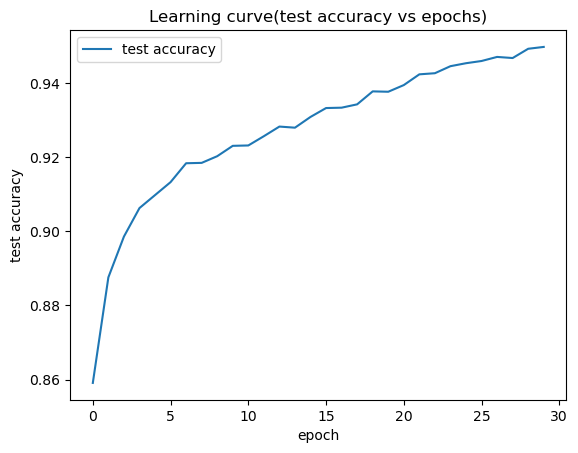

In [15]:
print(accuracy_nn)
plt.plot(range(epochs), accuracy_nn,label='test accuracy' )
plt.legend()
plt.title('Learning curve(test accuracy vs epochs)')
plt.xlabel('epoch')
plt.ylabel('test accuracy')
plt.show()

Q4.4

a) all weights initialized to 0

[0.1135, 0.098, 0.1032, 0.1135, 0.1135, 0.1135, 0.1135, 0.1135, 0.1135, 0.1135, 0.1135, 0.1135, 0.1135, 0.1135, 0.1135, 0.1135, 0.1135, 0.1135, 0.1135, 0.1135, 0.1135, 0.1135, 0.1135, 0.1135, 0.1135, 0.1135, 0.1135, 0.1135, 0.1135, 0.1135]


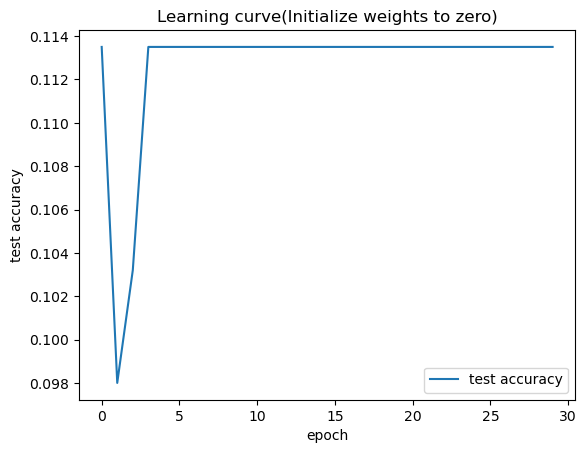

In [16]:
model = nn.Sequential(nn.Linear(input_size, hidden_layer_size, bias=False),
                      nn.Sigmoid(),
                      nn.Linear(hidden_layer_size, output_size, bias=False),
                      nn.LogSoftmax(dim=1))

# all weights initialized to 0
model[0].weight.data.fill_(0.0)
model[2].weight.data.fill_(0.0)

optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.0)
criterion = nn.NLLLoss() # to the LogSoftmax layer, if use cross entropy then no need logsoftmax


accuracy_nn = []
# train 
for i in range(epochs):
    for images, labels in trainLoader:
        images = images.view(images.shape[0], -1)
        # clear the last step gradient
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()

    # test
    correct, total = 0, 0
    for images,labels in testLoader:
        for i in range(len(labels)):
            img = images[i].view(1, 28*28)
            # Turn off gradients for forward pass
            with torch.no_grad():
                logps = model(img)
            ps = torch.exp(logps)
            probab = list(ps.numpy()[0])
            pred_label = probab.index(max(probab))
            true_label = labels.numpy()[i]
            if(true_label == pred_label):
                correct += 1
            total += 1
    accuracy_nn.append(correct/total)

print(accuracy_nn)
plt.plot(range(epochs), accuracy_nn,label='test accuracy' )
plt.legend()
plt.title('Learning curve(Initialize weights to zero)')
plt.xlabel('epoch')
plt.ylabel('test accuracy')
plt.show()

b) initialize the weights randomly between -1 and 1

[0.7399, 0.8026, 0.8309, 0.8477, 0.8613, 0.8698, 0.8773, 0.8824, 0.8869, 0.89, 0.8925, 0.8968, 0.9004, 0.9032, 0.9032, 0.9062, 0.9091, 0.9111, 0.9122, 0.9128, 0.9153, 0.9157, 0.9166, 0.9174, 0.9184, 0.9188, 0.921, 0.9232, 0.9234, 0.9241]


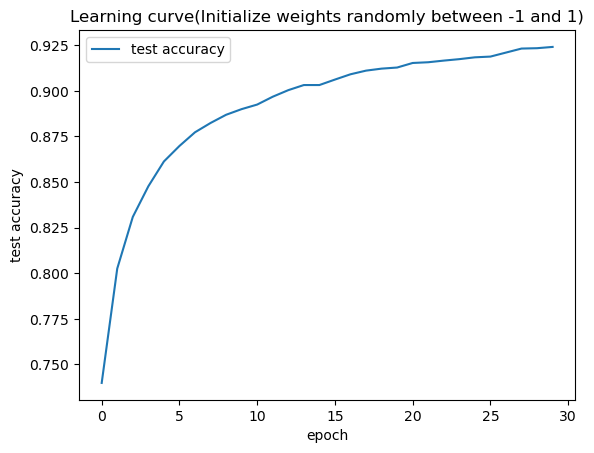

In [17]:
model = nn.Sequential(nn.Linear(input_size, hidden_layer_size, bias=False),
                      nn.Sigmoid(),
                      nn.Linear(hidden_layer_size, output_size, bias=False),
                      nn.LogSoftmax(dim=1))

#Initialize weights randomly between -1 and 1
for layer in model:
    if isinstance(layer, nn.Linear):
        nn.init.uniform_(layer.weight, -1, 1)

optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.0)
criterion = nn.NLLLoss() # to the LogSoftmax layer, if use cross entropy then no need logsoftmax


accuracy_nn = []
# train 
for i in range(epochs):
    for images, labels in trainLoader:
        images = images.view(images.shape[0], -1)
        # clear the last step gradient
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()

    # test
    correct, total = 0, 0
    for images,labels in testLoader:
        for i in range(len(labels)):
            img = images[i].view(1, 28*28)
            # Turn off gradients for forward pass
            with torch.no_grad():
                logps = model(img)
            ps = torch.exp(logps)
            probab = list(ps.numpy()[0])
            pred_label = probab.index(max(probab))
            true_label = labels.numpy()[i]
            if(true_label == pred_label):
                correct += 1
            total += 1
    accuracy_nn.append(correct/total)

print(accuracy_nn)
plt.plot(range(epochs), accuracy_nn,label='test accuracy' )
plt.legend()
plt.title('Learning curve(Initialize weights randomly between -1 and 1)')
plt.xlabel('epoch')
plt.ylabel('test accuracy')
plt.show()